<a href="https://colab.research.google.com/github/Junseokee/Study-Python/blob/main/pytoch_practice_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [3]:
import torch
torch.__version__

'1.11.0+cu113'

초기화되지않은 텐서

In [2]:
x = torch.empty(4,2)
print(x)

tensor([[6.5788e-35, 0.0000e+00],
        [3.3631e-44, 0.0000e+00],
        [       nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30]])


무작위로 초기화된 텐서

In [3]:
x = torch.rand(4,2)
print(x)

tensor([[0.6920, 0.2155],
        [0.6614, 0.5044],
        [0.2057, 0.0054],
        [0.0107, 0.2087]])


데이터타입이 long이고, 0으로 채워진 텐서

In [4]:
x = torch.zeros(4,2,dtype=torch.long) #0으로 채우기
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [5]:
x = torch.tensor([3, 2.3])
print(x) 

tensor([3.0000, 2.3000])


2 x 4 크기, double 타입, 1로 채워진 텐서

In [6]:
x = x.new_ones(4,2, dtype= torch.double)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [7]:
x = torch.randn_like(x, dtype=torch.float) #like(x)와 같은 모양의 랜덤 float으로 생성

텐서의 크기 계산

In [8]:
print(x.size())

torch.Size([4, 2])


#데이터 타입(Data Type)
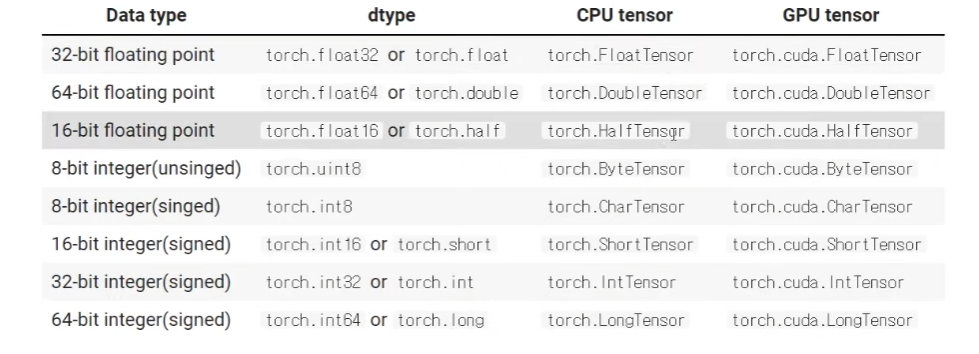![image.png](
  
)

In [9]:
ft = torch.FloatTensor([1, 2, 3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [10]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.0367])
-0.03667427971959114
torch.float32


In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #쿠다가 가능하면 gpu쿠다로 실행 아니면 cpu
print(device)
y = torch.ones_like(x, device=device) #토치로 기존 x와 같은 모양의 텐서를 하나를 만들어주는데 디바이스에 넣기
print(y)
x = x.to(device) #x텐서를 Gpu로 보내기 Cuda로
print(x)
z = x+y
print(z)
print(z.to('cpu', torch.double)) #z를 double type으로 cpu로 옮기기

cuda
tensor([1.], device='cuda:0')
tensor([-0.0367], device='cuda:0')
tensor([0.9633], device='cuda:0')
tensor([0.9633], dtype=torch.float64)


#다차원 텐서 표현

#0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 텐서(tensor)
- 축과 형상이 없음

In [12]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


#1D Tensor(Vector)
- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재

In [13]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


#2D Tensor(Matrix)
- 행렬과 같은 모양으로 두개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 샘플(sample)과 특성(feature)을 가진 구조로 사용


In [14]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


#3D Tensor
- Cube와 같은 모양으로 세개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 Sample, timesteps, features를 가진 구조로 사용

In [15]:
t3 = torch.tensor([[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


#4D Tensor
- 4개의 축
- 컬러 이미지 데이터가 대표적인 사례 (흑백은 3D로 가능)
- 주로 sample, height, width, 컬러채널(channel)을 가진 구조로 사용

#5D Tensor
- 5개의 축
- 비디오 데이터가 대표적
- 4D에 프레임 추가

In [16]:
import math

a = torch.rand(1, 2) * 2 -1
print(a)
print(torch.abs(a)) #절대값
print(torch.ceil(a)) #올림
print(torch.floor(a)) #내림
print(torch.clamp(a,-0.5,0.5))  #최소값과 최대값을 지정된 범위 안으로 그이상이면 0.5 이하면 -0.5로 지정

tensor([[-0.2241,  0.6633]])
tensor([[0.2241, 0.6633]])
tensor([[-0., 1.]])
tensor([[-1.,  0.]])
tensor([[-0.2241,  0.5000]])


In [18]:
print(a)
print(torch.max(a))
print(torch.min(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a)) #프로덕트 계산
print(torch.unique(torch.tensor([1,2,3,1,2,3]))) #중복제거한 값


tensor([[-0.2241,  0.6633]])
tensor(0.6633)
tensor(-0.2241)
tensor(0.2196)
tensor(0.6275)
tensor(-0.1486)
tensor([1, 2, 3])


max와 min은 dim 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax : 최대값을 가진 인덱스
- argmin : 최소값을 가진 인덱스

In [20]:
x = torch.rand(2,2)
print(x)
print(x.max(dim=0)) #배열중에 큰값을 산출
print(x.max(dim=1)) 
print(x.min(dim=0))

tensor([[0.9664, 0.9285],
        [0.4478, 0.5808]])
torch.return_types.max(
values=tensor([0.9664, 0.9285]),
indices=tensor([0, 0]))
torch.return_types.max(
values=tensor([0.9664, 0.5808]),
indices=tensor([0, 1]))
torch.return_types.min(
values=tensor([0.4478, 0.5808]),
indices=tensor([1, 1]))


In [21]:
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)

tensor([[0.0777, 0.3948],
        [0.3700, 0.4389]])
tensor([[0.5838, 0.1522],
        [0.8702, 0.5382]])


In [22]:
#덧셈
print(torch.add(x,y))

tensor([[0.6615, 0.5470],
        [1.2402, 0.9771]])


In [23]:
#결과를 텐서 인자로 출력
result = torch.empty(2,4)
torch.add(x,y, out = result)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:24.)
  This is separate from the ipykernel package so we can avoid doing imports until


tensor([[0.6615, 0.5470],
        [1.2402, 0.9771]])

In [24]:
#in-place방식 연산뒤엔 _가 붙음
print(x)
print(y)
y.add_(x) #x를 더한값이 y로 저장
print(y)

tensor([[0.0777, 0.3948],
        [0.3700, 0.4389]])
tensor([[0.5838, 0.1522],
        [0.8702, 0.5382]])
tensor([[0.6615, 0.5470],
        [1.2402, 0.9771]])


In [26]:
#뺄셈
print(x)
print(y)
print(x-y)
print(torch.sub(x,y))
print(x.sub(y))

tensor([[0.0777, 0.3948],
        [0.3700, 0.4389]])
tensor([[0.6615, 0.5470],
        [1.2402, 0.9771]])
tensor([[-0.5838, -0.1522],
        [-0.8702, -0.5382]])
tensor([[-0.5838, -0.1522],
        [-0.8702, -0.5382]])
tensor([[-0.5838, -0.1522],
        [-0.8702, -0.5382]])


In [27]:
#곱셈
print(x)
print(y)
print(x*y)
print(torch.mul(x,y))
print(x.mul(y))

tensor([[0.0777, 0.3948],
        [0.3700, 0.4389]])
tensor([[0.6615, 0.5470],
        [1.2402, 0.9771]])
tensor([[0.0514, 0.2160],
        [0.4589, 0.4288]])
tensor([[0.0514, 0.2160],
        [0.4589, 0.4288]])
tensor([[0.0514, 0.2160],
        [0.4589, 0.4288]])


In [28]:
#나눗셈
print(x)
print(y)
print(x*y)
print(torch.div(x,y))
print(x.div(y))

tensor([[0.0777, 0.3948],
        [0.3700, 0.4389]])
tensor([[0.6615, 0.5470],
        [1.2402, 0.9771]])
tensor([[0.0514, 0.2160],
        [0.4589, 0.4288]])
tensor([[0.1175, 0.7218],
        [0.2983, 0.4492]])
tensor([[0.1175, 0.7218],
        [0.2983, 0.4492]])


In [29]:
#내적 (dot product)
print(x)
print(y)
print(x*y)
print(torch.matmul(x,y))
z = torch.mm(x,y)
print(z)
print(torch.svd(z)) #d컴포지션? 행렬분해

tensor([[0.0777, 0.3948],
        [0.3700, 0.4389]])
tensor([[0.6615, 0.5470],
        [1.2402, 0.9771]])
tensor([[0.0514, 0.2160],
        [0.4589, 0.4288]])
tensor([[0.5411, 0.4283],
        [0.7891, 0.6312]])
tensor([[0.5411, 0.4283],
        [0.7891, 0.6312]])
torch.return_types.svd(
U=tensor([[-0.5640, -0.8258],
        [-0.8258,  0.5640]]),
S=tensor([1.2237, 0.0029]),
V=tensor([[-0.7819, -0.6234],
        [-0.6234,  0.7819]]))


#텐서의 조작(Manipulations)
 - 인덱싱 : Numpy처럼 인덱싱형태로 사용가능

In [34]:
x = torch.Tensor([[1,2],
                  [3,4]])
print(x)
print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])

print(x[:,0]) #행은 전부 0번째 칼럼
print(x[:,1]) #행은 전부 1번째 칼럼
print(x[0,:]) #열은 전부 0번째 행
print(x[1,:]) #열은 전부 1번째 칼럼

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([2., 4.])
tensor([1., 2.])
tensor([3., 4.])


In [37]:
#텐서의 크기(size)나 모양(shape) 변경
#기분적으로 변경전과 후에 텐서 안의 원소 개수가 유지되어야함
# - 1로 설정되면 계산을 통해 해당 크기값 유추
x = torch.randn(4,5)
print(x)
y = x.view(20)
print(y)
z = x.view(5,-1)

tensor([[-1.0334, -0.3201,  0.0183, -0.0810, -0.0103],
        [ 0.1361, -0.2377, -1.2615, -0.9908,  0.9057],
        [-0.4629,  1.8462, -1.9622, -2.1864, -0.0116],
        [ 0.7739,  0.6456, -1.1177,  1.1853, -1.0880]])
tensor([-1.0334, -0.3201,  0.0183, -0.0810, -0.0103,  0.1361, -0.2377, -1.2615,
        -0.9908,  0.9057, -0.4629,  1.8462, -1.9622, -2.1864, -0.0116,  0.7739,
         0.6456, -1.1177,  1.1853, -1.0880])


In [38]:
#item : 텐서에 값이 단 하나라도 존재하면 숫자값 얻음
#스칼라값 1개만 선택해야 사용 가능
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.0164])
-0.01640881411731243
torch.float32


- squeeze : 차원을 축소 제거
- unsqueeze : 차원을 증가 생성

In [39]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.5542, 0.3076, 0.7012],
         [0.5139, 0.5196, 0.2401],
         [0.2422, 0.5152, 0.9291]]])
torch.Size([1, 3, 3])


In [40]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.5542, 0.3076, 0.7012],
        [0.5139, 0.5196, 0.2401],
        [0.2422, 0.5152, 0.9291]])
torch.Size([3, 3])


In [41]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.8006, 0.3264, 0.6311],
        [0.6125, 0.7013, 0.5388],
        [0.9354, 0.6834, 0.8419]])
torch.Size([3, 3])


In [42]:
tensor = t.unsqueeze(dim=0) #1번째 차원을 기준으로 차원증가
print(tensor)
print(tensor.shape)

tensor([[[0.8006, 0.3264, 0.6311],
         [0.6125, 0.7013, 0.5388],
         [0.9354, 0.6834, 0.8419]]])
torch.Size([1, 3, 3])


In [43]:
tensor = t.unsqueeze(dim=2) #3번째 차원을 기준으로 차원증가
print(tensor)
print(tensor.shape)

tensor([[[0.8006],
         [0.3264],
         [0.6311]],

        [[0.6125],
         [0.7013],
         [0.5388]],

        [[0.9354],
         [0.6834],
         [0.8419]]])
torch.Size([3, 3, 1])


stack : 텐서간 결합

In [44]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)

print(torch.stack([x,y,z]))


tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat : 텐서를 결합하는 메소드(concatenate)
- 넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야함
- 해당 차원을 늘려준 후 결합

In [47]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b),dim=0)
print(c)
print(c.size())

tensor([[[-1.4106,  0.2688,  0.2072],
         [ 0.1910,  0.0606,  2.1284],
         [-0.5553,  1.4421,  1.6081]],

        [[ 1.4790,  0.6496, -0.1726],
         [ 1.5154, -2.8805,  0.1770],
         [-0.9748,  0.3069,  0.5314]]])
torch.Size([2, 3, 3])


In [48]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b),dim=1)
print(c)
print(c.size())

tensor([[[ 7.0540e-01, -8.6163e-01, -1.6188e+00],
         [-2.6461e-01, -2.6146e-01,  2.2550e-01],
         [ 2.2383e-02, -2.2910e+00,  1.3299e+00],
         [-1.7280e-04, -1.1477e+00, -1.4623e+00],
         [-2.3361e-02,  9.1710e-01,  2.2840e-01],
         [ 4.4062e-01, -4.7746e-01, -7.8199e-01]]])
torch.Size([1, 6, 3])


In [49]:
a = torch.randn(1,3,3)
b = torch.randn(1,3,3)
c = torch.cat((a,b),dim=2)
print(c)
print(c.size())

tensor([[[-1.2233,  1.1970,  1.1302,  0.5352, -0.3243,  0.9206],
         [-1.5815, -0.7323,  0.0570, -0.6557,  2.2825,  0.6167],
         [-1.5696,  0.4139,  0.0859,  0.2108,  0.6472, -0.0683]]])
torch.Size([1, 3, 6])


chunk : 텐서를 여러개로 나눌때 사용

In [50]:
tensor = torch.rand(3,6)
print(tensor)
t1,t2,t3 = torch.chunk(tensor,3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.2939, 0.9588, 0.0116, 0.9579, 0.5827, 0.1565],
        [0.7406, 0.5077, 0.4192, 0.8102, 0.0369, 0.5895],
        [0.5663, 0.8585, 0.8732, 0.9989, 0.9961, 0.6360]])
tensor([[0.2939, 0.9588],
        [0.7406, 0.5077],
        [0.5663, 0.8585]])
tensor([[0.0116, 0.9579],
        [0.4192, 0.8102],
        [0.8732, 0.9989]])
tensor([[0.5827, 0.1565],
        [0.0369, 0.5895],
        [0.9961, 0.6360]])


In [51]:
#split :chunk랑 동일한 기능이지만 조금 다름(텐서의 크기는 몇인가?)
tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.3048, 0.0250, 0.6341, 0.4322, 0.6719, 0.4395],
        [0.5777, 0.7293, 0.8935, 0.2534, 0.6012, 0.5277],
        [0.3036, 0.2483, 0.9288, 0.9474, 0.2787, 0.1538]])
tensor([[0.3048, 0.0250, 0.6341],
        [0.5777, 0.7293, 0.8935],
        [0.3036, 0.2483, 0.9288]])
tensor([[0.4322, 0.6719, 0.4395],
        [0.2534, 0.6012, 0.5277],
        [0.9474, 0.2787, 0.1538]])


torch <-> numpy
- torch Tensor를 numpy array로 변환 가능
- Tensor가 Cpu상에 있다면 Numpy 배열은 메모리 공간을 공유하므로 하나가변하면 다른 하나도 변함

In [52]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [53]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [55]:
a.add_(1) #a만 변해도 a와 b가 함께 변함
print(a)
print(b)

tensor([3., 3., 3., 3., 3., 3., 3.])
[3. 3. 3. 3. 3. 3. 3.]


In [4]:
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a) #a에 1을 더하고 그걸 a에 저장
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


Autograd(자동미분)
- torch.autograd 패키지는 Tensor의 모든 연산에 대해 자동미분 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- backprop를 위해 미분값을 자동으로 계산

requires_grad 속성을 True로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작
기록을 추적하는 것을 중단하게 하려면, .datach()를 호출하여 연산기록으로 부터 분리

In [4]:
a = torch.randn(3,3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[-3.4128, -4.3669,  1.4001],
        [-4.6175, -1.7061, -1.5089],
        [-2.4096, -1.7948, -0.4555]])
False


requires_grad(...)는 기존 텐서의 requires_grad 값을 바꿔치기(in_place)하여 변경
grad_fn : 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에대해서 backprop했는지)

In [6]:
a.requires_grad_(True)
print(a.requires_grad)

b = (a*a).sum() #a*a의 총합
print(b) #sum연산으로 한것이 기록으로 남음 SumBackward
print(b.grad_fn)

True
tensor(68.4202, grad_fn=<SumBackward0>)


기울기(Gradient)

In [7]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [8]:
y = x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [9]:
z = y * y
out = z.mean()
print(z, out) #Mul -> 곱에대한  Mean -> 평균에대한 연산 저장

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후, .backword()를 호출하면 자동으로 역전파 계산이 가능하고, .grad 속성에 누적됨

https://ko.wikipedia.org/wiki/%EC%97%AD%EC%A0%84%ED%8C%8C
역전파(逆傳播), 오차 역전파법(영어: Backpropagation 백프로퍼게이션[*]) 또는 오류 역전파 알고리즘은 다층 퍼셉트론 학습에 사용되는 통계적 기법을 의미한다.

기계 학습에서 사용되는 학습 구조로 다층 퍼셉트론이 있다. 일반적인 다층 퍼셉트론의 형태는 입력층 - 은닉층 - 은닉층 - ... - 출력층으로 구성되며, 각 층은 서로 교차되는 가중치 값으로 연결되어 있다. 출력층에서 제시한 값이 실제 원하는 값에 가까워지도록 학습하기 위해 통계적 방법에 의한 오차역전법을 사용한다.

오차역전법은 동일 입력층에 대해 원하는 값이 출력되도록 개개의 가중치를 조정하는 방법으로 사용되며, 속도는 느리지만 안정적인 결과를 얻을 수 있는 장점이 있어 기계 학습에 널리 사용되고 있다.

In [10]:
print(out)
out.backward() #역전파 계산 가능

tensor(36., grad_fn=<MeanBackward0>)


grad : data가 거쳐온 layer에 대한 미분값 저장

In [11]:
print(x)
print(x.grad) #미분값

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [6]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() <1000: #반복문
  y = y * 2

print(y)

tensor([-626.3344,  810.0084,  -81.6145], grad_fn=<MulBackward0>)


In [7]:
v = torch.tensor([0.1,1.0,0.0001], dtype = torch.float) #[]값 기준으로
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


with torch.no_grad()를 사용하여 기울기의 업데이트를 하지않음
기록을 추적하는 것을 방지하기 위해 코드 블럭을 with torch.no_grad()로 감싸면 기울기 게산을 필요없지만,
requires_grad= True로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [8]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad(): #기울기 계산 X
  print((x ** 2 ).requires_grad)

True
True
False


detach() : 내용물(content)는 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [10]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


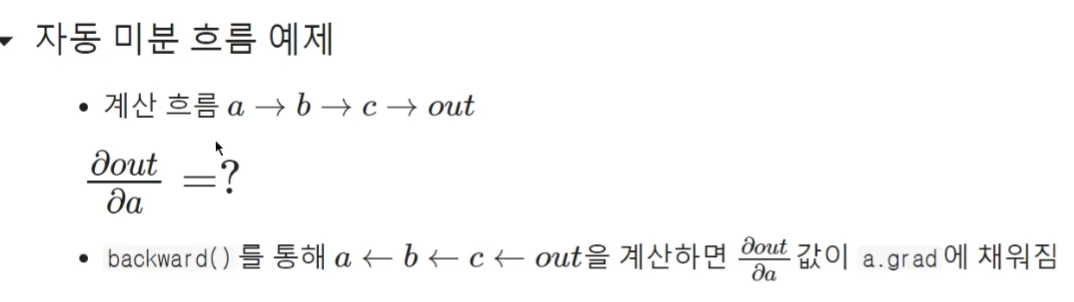!

In [11]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [12]:
a = torch.ones(2,2,requires_grad =True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [13]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
None
None


In [14]:
b = a + 2
print(b)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [16]:
c = b ** 2
print(c)

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [17]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [18]:
print(out) #제일 마지막 계산법 Sum
out.backward()

tensor(36., grad_fn=<SumBackward0>)


In [19]:
print(a.data)
print(a.grad) #a의 활용값?
print(a.grad_fn)

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [20]:
print(b.data) #b의 현재값
print(b.grad) 
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:475.)
  return self._grad


In [21]:
print(out.data) #sum의 계산값
print(out.grad) 
print(out.grad_fn) #sum 값

tensor(36.)
None


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:475.)
  return self._grad


#데이터 준비

파이토치에서는 데이터 준비를 위해 torch.utils.data의 Dataset과 DataLoader 사용가능
- Dataset에는 다양한 데이터 셋이 존재 (MNIST, FashionMNIST, CIFAR10,...)
 - Vision Dataset : https://pytorch.org/vision/stable/datasets.html
 - Text Dataset : https://pytorch.org/text/stable/datasets.html
 - Audio Dataset : https://pytorch.org/audio/stable/datasets.html

- DataLoader Dataset을 통해 batch_size, train 여부, transform 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해 줄 수 있음

In [27]:
from torch.utils.data import Dataset, DataLoader

*토치비전(torchvision)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지 *
 - transforms : 전처리할때 사용하는 메소드(https://pytorch.org/docs/stable/torchvision/transforms.html)
 - transforms에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행

In [28]:
import torchvision.transforms as transforms
from torchvision import datasets

DataLoader의 인자로 들어갈 transform을 미리 정의할 수 있고, Compose를 통해 리스트 안에 순서대로 전처리 진행
ToTensor()를 하는 이유는 torchvision이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor 형으로 변환 필요

In [29]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,), std=(1.0,))])
                                     

In [30]:
trainset = datasets.MNIST(root='/content/',
                          train=True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='/content/',
                          train=False, download=True,
                          transform=mnist_transform)


DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기만큼 데이터를 가져옴

In [32]:
train_loader = DataLoader(trainset, batch_size = 8, shuffle=True, num_workers=2) #셔플 = 섞는거 동작할 워커 2개
test_loader = DataLoader(testset, batch_size = 8, shuffle=False, num_workers=2)

In [33]:
dataiter = iter(train_loader) #8개의 1이면 흑백사진을 28 * 28이미지
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [34]:
torch_image = torch.squeeze(images[0]) #차원 축소
torch_image.shape

torch.Size([28, 28])

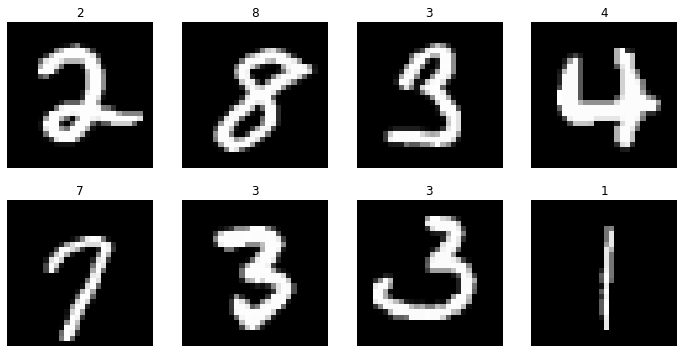

In [46]:
import matplotlib.pyplot as plt #시각화 library

figure = plt.figure(figsize=(12,6)) #객체 생성 사이즈 지정
cols, rows = 4, 2 #컬럼 행 갯수 지정
for i in range(1, cols * rows + 1): #반복문 -> 1~9까지 반복 
  sample_idx = torch.randint(len(trainset), size = (1,)).item() #사이즈 기준으로 랜덤하게 이미지를 받아온 아이템 값을 인덱스로 사용
  img, label = trainset[sample_idx] #실제 샘플인덱스
  figure.add_subplot(rows, cols, i) 
  plt.title(label) #위에 실제 라벨(정답) 표시
  plt.axis('off') #축 삭제
  plt.imshow(img.squeeze(), cmap='gray') #이미지 축소?
plt.show() #출력

# 신경망 구성
- layer : 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의  텐서를 출력
- module : 한 개 이상의 계층이 모여서 구성
- moder : 한 개 이상의 모듈이 모여서 구성

torch.nn 패키지
주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용(weight 값들을 직접 선언안함)

https://pytorch.org/docs/stable/nn.html

In [47]:
import torch.nn as  nn #뉴런 네트워크

nn.Linear 계층 예제

In [49]:
input = torch.randn(128, 20)
print(input)

m = nn.Linear(20, 30) #입력 20개 출력 30개
print(m)


output = m(input) #모델에 인풋값을 넣었을때 값
print(output) #20, 30
print(output.size())

tensor([[-0.2715,  0.5748, -0.3773,  ...,  0.3764,  0.0788, -1.0599],
        [-0.2225, -0.3592,  0.0076,  ..., -0.3866, -1.1795,  1.2693],
        [-1.7042,  0.5480, -0.8648,  ...,  1.1646, -0.7262, -1.2609],
        ...,
        [-0.4574, -0.7241,  0.5567,  ..., -0.4852, -0.7655,  0.0742],
        [ 0.0873, -0.5924,  1.0208,  ...,  1.1859,  0.6906,  1.2178],
        [-0.0565,  0.2606,  1.4616,  ..., -0.0853,  0.2907,  0.3195]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-0.5113,  0.0685,  1.2842,  ..., -1.3687, -0.1200, -0.6868],
        [-0.1552,  0.2786,  0.2147,  ..., -0.1350,  0.2246, -1.2416],
        [-0.9357, -1.2533, -0.3865,  ...,  0.7622,  0.4438,  0.5284],
        ...,
        [-0.1808,  0.8080, -0.1392,  ...,  0.3873, -0.2024, -0.5709],
        [-0.3208, -0.0177,  0.6574,  ...,  0.6889, -1.1160, -1.8771],
        [-0.4995,  0.6268,  0.4076,  ..., -0.1178, -0.8822, -0.9345]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


nn.Conv2d 계층 예시

In [50]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [52]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2))
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2), dilation = (3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [53]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


#컨볼루션 레이어(Convolution Laters

## nn.Conv2d 예제
 - in_channels : channel의 갯수
 - out_channels: 출력 채널 갯수
 - kernel_size: 커널 필터 사이즈

In [54]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [55]:
layer = nn.Conv2d(1,20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [56]:
#weight 확인
#weight는 datach()를 통해 꺼내줘야 numpy() 변환이 가능
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [57]:
weight = weight.detach()

In [58]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

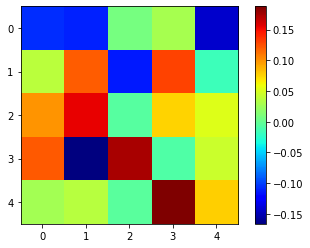

In [60]:
plt.imshow(weight[0,0,:,:], 'jet') #처음부터 끝까지 컬러백 = jet(화려)
plt.colorbar()
plt.show()

In [61]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0]) #차원 축소
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [63]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size()) #흑백 사진 한장을 의미

output_data = layer(input_data)
output = output_data.data #데이터에 대해서만 변환
output_arr = output.numpy()
output_arr.shape #레이어 통과후 데이터만 뽑아서 넘파이로 만든것의 모양?

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

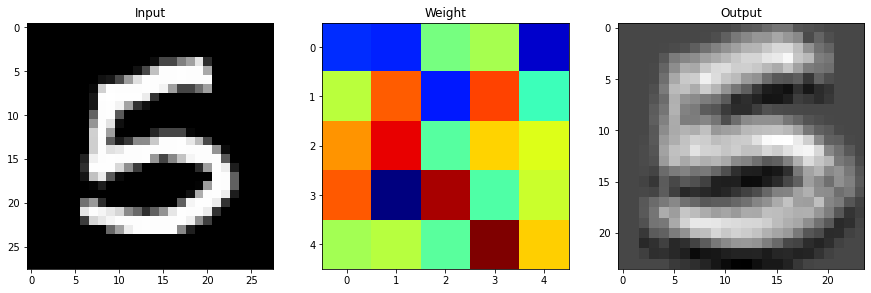

In [64]:
plt.figure(figsize=(15,30))

plt.subplot(131) #인풋값
plt.title("Input")
plt.imshow(input_image, 'gray')

plt.subplot(132) #가중치 적용
plt.title("Weight")
plt.imshow(weight[0,0,:,:], 'jet')

plt.subplot(133) #가중치 적용된 값
plt.title("Output")
plt.imshow(output_arr[0,0,:,:], 'gray')
plt.show()

#풀링 레이어(Pooling laters)
- F.max_pool2d
 - stride
 - kernel_size
- torch.nn.Maxpool2d도 많이 사용

- MaxPool Layer는 weight가 없기 때문에 바로 numpy() 변환 가능